In [42]:
from pyforest import * 

In [156]:
train = pd.read_excel("C:/Users/SAAD KHAN/Desktop/Data Science/Machine Learning/Supervised Learning-Classification/Food Delivery/Data_Train.xlsx")
test  =pd.read_excel("C:/Users/SAAD KHAN/Desktop/Data Science/Machine Learning/Supervised Learning-Classification/Food Delivery/Data_Test.xlsx")

In [157]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [158]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [159]:
print(train.columns)
print()
print(test.columns)

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews'],
      dtype='object')


In [160]:
train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [161]:
test.isnull().sum() 

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [162]:
train.shape

(11094, 9)

In [163]:
test.shape

(2774, 8)

### Observation 
1. location and cuisines need cleaning 

2. remove the rupee symbol from avg cost and min cost 

3. check the rating and reviews there is a relation between rating votes and reviews.

4. target variable holds minutes word as string hence it appears to be categorical  we need to explore this 

### univariate analysis

In [164]:
#combine the data set 
combined = pd.concat([train,test], sort=False, ignore_index=True)

In [165]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [166]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
Restaurant       13868 non-null object
Location         13868 non-null object
Cuisines         13868 non-null object
Average_Cost     13868 non-null object
Minimum_Order    13868 non-null object
Rating           13868 non-null object
Votes            13868 non-null object
Reviews          13868 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 975.2+ KB


In [167]:
combined.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64

In [168]:
#Delivery Time 
#we use here label encoding for ml 
combined.Delivery_Time.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

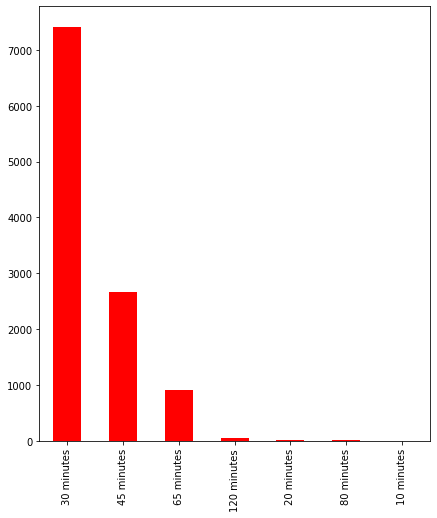

In [169]:
combined.Delivery_Time.value_counts().plot(kind="bar", color="red",figsize=[7,8])

In [170]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [171]:
# Review the dash in review 
combined.Reviews.unique()

array(['4', '30', '95', '235', '18', '31', '1235', '26', '294', '61',
       '1239', '-', '128', '5', '53', '47', '46', '23', '160', '2', '1',
       '38', '9', '19', '7', '132', '74', '13', '111', '499', '29', '34',
       '851', '513', '22', '27', '32', '25', '37', '8', '35', '6', '173',
       '36', '15', '174', '11', '59', '16', '89', '170', '10', '1660',
       '71', '41', '20', '40', '3', '191', '105', '100', '106', '21',
       '65', '69', '2547', '159', '110', '42', '181', '109', '179', '490',
       '28', '343', '118', '690', '72', '296', '33', '164', '50', '129',
       '1581', '234', '45', '2363', '24', '115', '12', '138', '175', '39',
       '66', '1603', '1443', '390', '108', '1457', '112', '107', '259',
       '269', '52', '196', '794', '589', '48', '145', '536', '247', '17',
       '49', '245', '87', '83', '54', '453', '318', '99', '205', '165',
       '1845', '766', '114', '44', '51', '104', '478', '70', '232', '435',
       '14', '659', '554', '399', '77', '88', '503',

In [172]:
#votes 
combined.Votes.value_counts()
# Dash in votes 

-       2616
4        298
6        255
7        242
9        238
5        227
8        216
12       191
11       173
10       173
13       144
15       143
16       133
18       127
14       123
22       120
20       115
19       111
17       103
26        98
27        96
21        90
37        89
23        86
28        85
25        83
24        83
29        81
31        80
34        77
        ... 
637        1
1978       1
1189       1
2153       1
2158       1
2472       1
1160       1
1852       1
859        1
1487       1
595        1
1183       1
1101       1
4109       1
1632       1
395        1
4094       1
496        1
2962       1
1426       1
1326       1
2513       1
7661       1
882        1
528        1
5116       1
1249       1
992        1
1147       1
663        1
Name: Votes, Length: 1181, dtype: int64

In [173]:
#Rating 
combined.Rating.unique()
#Dash string based info such as new, opeaning soon and temp closed 

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [174]:
#Averagecost 
combined.Average_Cost.unique
#symbol and comma and for 

<bound method Series.unique of 0        ₹200
1        ₹100
2        ₹150
3        ₹250
4        ₹200
5        ₹150
6        ₹150
7        ₹650
8        ₹100
9        ₹200
10       ₹350
11       ₹800
12       ₹150
13        ₹50
14       ₹100
15       ₹100
16       ₹100
17       ₹200
18       ₹150
19       ₹100
20       ₹200
21       ₹150
22       ₹250
23       ₹200
24       ₹150
25       ₹100
26       ₹100
27       ₹150
28       ₹150
29       ₹200
         ... 
13838    ₹200
13839    ₹300
13840    ₹250
13841     ₹50
13842    ₹250
13843    ₹200
13844    ₹250
13845    ₹200
13846    ₹100
13847    ₹200
13848    ₹100
13849    ₹300
13850     ₹50
13851    ₹100
13852    ₹350
13853    ₹150
13854    ₹100
13855    ₹150
13856    ₹200
13857    ₹800
13858    ₹100
13859    ₹150
13860    ₹150
13861    ₹200
13862    ₹300
13863    ₹100
13864    ₹250
13865    ₹150
13866    ₹100
13867    ₹150
Name: Average_Cost, Length: 13868, dtype: object>

In [175]:
#minimum order 
combined.Minimum_Order.unique()
# Symbol rupe clean 

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59', '₹149', '₹399'], dtype=object)

In [176]:
# this kind of  error are called noise in data when data show lots of unwanted symbol or words.

In [177]:
#Minimum_Order which is allso are called price clean the column 
#split the number and rupe 
int(combined.Minimum_Order[0].split("₹")[1])

50

In [178]:
mylist=[]
for i in combined.Minimum_Order:
    mylist.append(i.split("₹")[1])    

In [179]:
#Adding a new col - MinOrder_Cleansed
combined['MinOrder_Cleansed']=pd.Series(mylist)

In [180]:
#Average Cost Cleanig 
combined.Average_Cost.unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [181]:
a = "₹2,050".split("₹")[1]

In [182]:
int(a.replace(",",""))

2050

In [183]:
int("₹2,050".split("₹")[1].replace(",","")) 

2050

In [184]:
combined.loc[combined.Average_Cost=="for"]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes,50


In [185]:
combined.loc[combined.Average_Cost=="for","Average_Cost"]='0'

In [186]:
cost=[] 
for i in combined.Average_Cost:
    cost.append(int(i.replace("₹","").replace(",",""))) 
    

In [187]:
combined["Average_Cleansed"] = pd.Series(cost)

In [188]:
#clean Location 
combined.Location[0].split(",")[-1] 

' Pune'

In [189]:
locs=[]
for i in combined.Location:
    locs.append(i.split(", ")[-1]) 

In [190]:
combined['Location_Cleansed'] = pd.Series(locs)

In [191]:
combined.Location_Cleansed.unique() 

array(['Pune', 'Marathalli', 'Mumbai Central', 'Noida', 'Whitefield',
       'Delhi University-GTB Nagar', 'Maharashtra', 'Timarpur', 'Kolkata',
       'Mumbai CST Area', 'Pune University', 'BTM Layout,Bangalore',
       'Gurgoan', 'Begumpet', 'Majestic', 'India Gate', 'Hyderabad',
       'Sector 63A,Gurgaon', 'Delhi Cantt.', 'Mumbai', 'Delhi',
       'Electronic City'], dtype=object)

In [192]:
#Banglore City 
combined[combined.Location_Cleansed=="Electronic City"]['Location']

2019     BTM Layout 1, Electronic City
2853     BTM Layout 1, Electronic City
2981     BTM Layout 1, Electronic City
3470     BTM Layout 1, Electronic City
3601     BTM Layout 1, Electronic City
3623     BTM Layout 1, Electronic City
3628     BTM Layout 1, Electronic City
4262     BTM Layout 1, Electronic City
4453     BTM Layout 1, Electronic City
7403     BTM Layout 1, Electronic City
7612     BTM Layout 1, Electronic City
8139     BTM Layout 1, Electronic City
8272     BTM Layout 1, Electronic City
8793     BTM Layout 1, Electronic City
9256     BTM Layout 1, Electronic City
9510     BTM Layout 1, Electronic City
9564     BTM Layout 1, Electronic City
10053    BTM Layout 1, Electronic City
10211    BTM Layout 1, Electronic City
10363    BTM Layout 1, Electronic City
10584    BTM Layout 1, Electronic City
11089    BTM Layout 1, Electronic City
11108    BTM Layout 1, Electronic City
11186    BTM Layout 1, Electronic City
11410    BTM Layout 1, Electronic City
12611    BTM Layout 1, El

In [193]:
combined.Location_Cleansed.replace(to_replace =["Marathalli",'Whitefield','Majestic',
                                                'BTM Layout,Bangalore','Electronic City'],
                                  value=['Bangalore']*5,inplace=True) 

In [194]:
combined.Location_Cleansed.unique() 

array(['Pune', 'Bangalore', 'Mumbai Central', 'Noida',
       'Delhi University-GTB Nagar', 'Maharashtra', 'Timarpur', 'Kolkata',
       'Mumbai CST Area', 'Pune University', 'Gurgoan', 'Begumpet',
       'India Gate', 'Hyderabad', 'Sector 63A,Gurgaon', 'Delhi Cantt.',
       'Mumbai', 'Delhi'], dtype=object)

In [195]:
#Pune 
combined.Location_Cleansed.replace(to_replace =['Pune University','Maharashtra'],
                                  value=['Pune']*2,inplace=True) 

In [196]:
combined.Location_Cleansed.unique() 

array(['Pune', 'Bangalore', 'Mumbai Central', 'Noida',
       'Delhi University-GTB Nagar', 'Timarpur', 'Kolkata',
       'Mumbai CST Area', 'Gurgoan', 'Begumpet', 'India Gate',
       'Hyderabad', 'Sector 63A,Gurgaon', 'Delhi Cantt.', 'Mumbai',
       'Delhi'], dtype=object)

In [197]:
#Delhi 
combined.Location_Cleansed.replace(to_replace =['Delhi University-GTB Nagar','Timarpur',
                                               'India Gate','Delhi Cantt.'],
                                  value=['Delhi']*4,inplace=True)

In [198]:
combined.Location_Cleansed.unique() 

array(['Pune', 'Bangalore', 'Mumbai Central', 'Noida', 'Delhi', 'Kolkata',
       'Mumbai CST Area', 'Gurgoan', 'Begumpet', 'Hyderabad',
       'Sector 63A,Gurgaon', 'Mumbai'], dtype=object)

In [199]:
#Gurgaon Spell check 
combined.loc[combined.Location_Cleansed=="Gurgoan",'Location_Cleansed']="Gurgaon"

In [200]:
combined.Location_Cleansed.unique()

array(['Pune', 'Bangalore', 'Mumbai Central', 'Noida', 'Delhi', 'Kolkata',
       'Mumbai CST Area', 'Gurgaon', 'Begumpet', 'Hyderabad',
       'Sector 63A,Gurgaon', 'Mumbai'], dtype=object)

In [293]:
#Gurgaon
#combined.Location_Cleansed.replace('Sector 63A,Gurgaon','Gurgaon',inplace=True)
combined.Location_Cleansed.replace(to_replace =["Sector 63A,Gurgaon"],
                                  value=['Gurgaon'],inplace=True)

In [294]:
combined.Location_Cleansed.unique()

array(['Pune', 'Bangalore', 'Mumbai', 'Noida', 'Delhi', 'Kolkata',
       'Gurgaon', 'Hyderabad'], dtype=object)

In [295]:
#Mumbai 
combined.Location_Cleansed.replace(to_replace =['Mumbai CST Area','Mumbai Central'],
                                  value=['Mumbai']*2,inplace=True)

In [296]:
#Begumpet convert into Hyderabad
combined.Location_Cleansed.replace(to_replace =["Begumpet"],
                                  value=['Hyderabad'],inplace=True)

In [297]:
combined.Location_Cleansed.unique()

array(['Pune', 'Bangalore', 'Mumbai', 'Noida', 'Delhi', 'Kolkata',
       'Gurgaon', 'Hyderabad'], dtype=object)

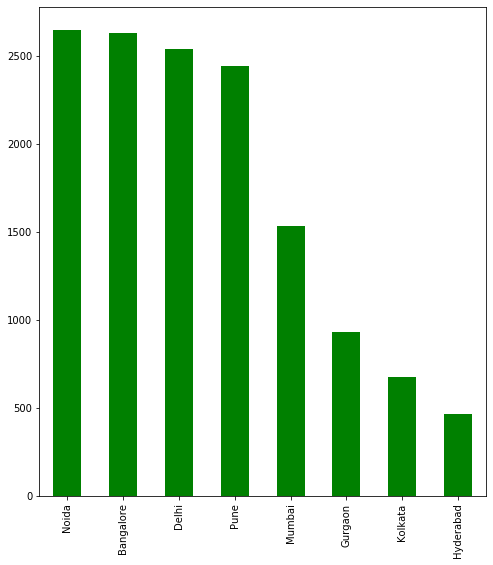

In [298]:
combined.Location_Cleansed.value_counts().plot(kind="bar", figsize=[8,9], color="Green") 

In [299]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'MinOrder_Cleansed',
       'Average_Cleansed', 'Location_Cleansed', 'Cuisines_Cleansed',
       'Rating_Category'],
      dtype='object')

In [300]:
#now we have to deal with Cuisines

In [301]:
combined.Cuisines.unique() 

array(['Fast Food, Rolls, Burger, Salad, Wraps', 'Ice Cream, Desserts',
       'Italian, Street Food, Fast Food', ...,
       'North Indian, Chinese, Japanese',
       'Asian, Italian, Continental, Desserts, Healthy Food',
       'North Indian, Rolls, Chinese, Continental, Fast Food'],
      dtype=object)

In [302]:
combined.Cuisines[0].split(", ") 

['Fast Food', 'Rolls', 'Burger', 'Salad', 'Wraps']

In [303]:
food=[]
for i in combined.Cuisines:
    food.append(i.split(", ")) 

In [304]:
df = pd.DataFrame(food)

In [305]:
df[0].unique()

array(['Fast Food', 'Ice Cream', 'Italian', 'Mughlai', 'Cafe',
       'South Indian', 'Beverages', 'Chinese', 'Mithai', 'North Indian',
       'Burger', 'Biryani', 'Kerala', 'Desserts', 'Bakery', 'Asian',
       'Street Food', 'Pizza', 'Lucknowi', 'Tea', 'Rolls', 'Bengali',
       'Mishti', 'European', 'Momos', 'Continental', 'Andhra', 'German',
       'Finger Food', 'Sandwich', 'Chettinad', 'Juices', 'Parsi',
       'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian', 'Bar Food', 'Konkan', 'Odia', 'Paan',
       'Wraps', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'BBQ', 'Coffee', 'Mexican', 'Goan',
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
       'Frozen Yogurt', 'Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi', 'Hot dogs',
       'Iranian', 'Brazilian', 'Indian', 'Af

In [306]:
fastfood = ['Fast Food','Cafe',
       'Burger','Bakery',
       'Street Food', 'Pizza','Rolls','Momos',
       'Finger Food', 'Sandwich','Bar Food','Wraps','Hot dogs']

deserts = ['Ice Cream',  'Mithai', 'Desserts', 'Paan','Frozen Yogurt',
       'Mishti']

beverages = ['Juices','Tea','Coffee','Bubble Tea','Bevarages']

maincourse = ['Italian', 'Mughlai', 'South Indian','Chinese','North Indian','Biryani',
              'Kerala','Asian','Lucknowi', 'Bengali','European', 'Momos', 'Continental',
              'Andhra', 'German','Chettinad','Parsi','Japanese', 'Salad', 'Tamil',
              'North Eastern', 'Maharashtrian','Tibetan', 'Arabian', 'Konkan', 'Odia',
              'Lebanese', 'American', 'Mediterranean', 'Bohri','Mangalorean', 'Thai',
              'Healthy Food', 'Raw Meats', 'Gujarati','Seafood', 'Rajasthani', 'BBQ',
              'Mexican', 'Goan','Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
              'Afghan', 'Awadhi', 'Malwani', 'Malaysian','Hyderabadi', 'French', 'Modern Indian',
              'Sushi','Iranian', 'Brazilian', 'Indian', 'African','Turkish', 'Assamese', 'Naga',
              'Middle Eastern', 'Vietnamese','Steak','Cantonese','Belgian','Charcoal Chicken',
              'Tex-Mex', 'Spanish', 'Roast Chicken','Burmese','Nepalese']
 

In [307]:
# function to covert into categories 
def foodcatbanao(x):
    if(x in fastfood):
        return("Fast Food")
    elif(x in beverages):
        return("Beverages")
    elif(x in deserts):
        return("Deserts")
    else:
        return("maincourse")

In [308]:
combined["Cuisines_Cleansed"] = pd.Series(df[0].apply(foodcatbanao)) 

In [237]:
#deal with 0 value in average_cost 
combined.loc[combined.Average_Cost=="0"]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed
6297,ID_6472,Pune University,Fast Food,0,₹50,NEW,-,-,30 minutes,50,0,Pune,Fast Food


In [309]:
combined[(combined.Location_Cleansed=="Pune") &
         (combined.Cuisines_Cleansed=="Fast Food")]["Average_Cleansed"].describe() 

count    892.000000
mean     183.520179
std      112.579921
min       50.000000
25%      100.000000
50%      150.000000
75%      200.000000
max      800.000000
Name: Average_Cleansed, dtype: float64

In [310]:
#imputing value 
combined.loc[combined.Average_Cost=='0',"Average_Cleansed"]= 150

In [311]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99.0,30.0,65 minutes,50,150,Mumbai,maincourse,Good
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176.0,95.0,30 minutes,99,250,Noida,maincourse,Good
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


In [312]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 14 columns):
Restaurant           13868 non-null object
Location             13868 non-null object
Cuisines             13868 non-null object
Average_Cost         13868 non-null object
Minimum_Order        13868 non-null object
Rating               13868 non-null float64
Votes                13868 non-null float64
Reviews              13868 non-null float64
Delivery_Time        11094 non-null object
MinOrder_Cleansed    13868 non-null object
Average_Cleansed     13868 non-null int64
Location_Cleansed    13868 non-null object
Cuisines_Cleansed    13868 non-null object
Rating_Category      13868 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 1.5+ MB


In [313]:
#Rating and Reviews 
combined.Rating.unique()

array([3.5, 3.6, 3.7, 3.2, 3.8, 4. , 3.9, 4.2, 2.8, 3. , 3.3, 3.1, 4.7,
       3.4, 4.1, 2.9, 4.6, 4.3, 2.6, 4.5, 4.4, 4.8, 2.4, 2.7, 2.5, 2.2,
       4.9, 2.3, 2.1])

In [314]:
combined[combined.Rating=="NEW"].head()

C:\Users\SAAD KHAN\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category


In [315]:
#Rating convert into number 
combined.Rating = pd.to_numeric(combined.Rating,errors="coerce") 

In [316]:
combined.Rating.describe()

count    13868.000000
mean         3.608869
std          0.374883
min          2.100000
25%          3.400000
50%          3.600000
75%          3.800000
max          4.900000
Name: Rating, dtype: float64

In [317]:
combined.Rating.fillna(value = 3.6,inplace=True)

In [318]:
#Reviews
combined.Reviews.unique()

array([4.000e+00, 3.000e+01, 9.500e+01, 2.350e+02, 1.800e+01, 3.100e+01,
       1.235e+03, 2.600e+01, 2.940e+02, 6.100e+01, 1.239e+03, 1.280e+02,
       5.000e+00, 5.300e+01, 4.700e+01, 4.600e+01, 2.300e+01, 1.600e+02,
       2.000e+00, 1.000e+00, 3.800e+01, 9.000e+00, 1.900e+01, 7.000e+00,
       1.320e+02, 7.400e+01, 1.300e+01, 1.110e+02, 4.990e+02, 2.900e+01,
       3.400e+01, 8.510e+02, 5.130e+02, 2.200e+01, 2.700e+01, 3.200e+01,
       2.500e+01, 3.700e+01, 8.000e+00, 3.500e+01, 6.000e+00, 1.730e+02,
       3.600e+01, 1.500e+01, 1.740e+02, 1.100e+01, 5.900e+01, 1.600e+01,
       8.900e+01, 1.700e+02, 1.000e+01, 1.660e+03, 7.100e+01, 4.100e+01,
       2.000e+01, 4.000e+01, 3.000e+00, 1.910e+02, 1.050e+02, 1.000e+02,
       1.060e+02, 2.100e+01, 6.500e+01, 6.900e+01, 2.547e+03, 1.590e+02,
       1.100e+02, 4.200e+01, 1.810e+02, 1.090e+02, 1.790e+02, 4.900e+02,
       2.800e+01, 3.430e+02, 1.180e+02, 6.900e+02, 7.200e+01, 2.960e+02,
       3.300e+01, 1.640e+02, 5.000e+01, 1.290e+02, 

In [319]:
combined.Reviews = pd.to_numeric(combined.Reviews,errors="coerce") 

In [320]:
combined.Reviews.describe()

count    13868.000000
mean       101.015287
std        283.239725
min          1.000000
25%         10.000000
50%         26.000000
75%         63.000000
max       6504.000000
Name: Reviews, dtype: float64

In [321]:
combined.Reviews.fillna(value = 26,inplace=True)

In [322]:
#Votes
combined.Votes = pd.to_numeric(combined.Votes,errors="coerce")

In [323]:
combined.Votes.describe()

count    13868.000000
mean       207.463441
std        499.902608
min          3.000000
25%         25.000000
50%         63.000000
75%        156.000000
max       9054.000000
Name: Votes, dtype: float64

In [324]:
combined.Votes.fillna(value =63, inplace=True)

In [325]:
#Rating Cat Function 
def rating_cat(x):
    if(x>=4.5):
        return("Excellent")
    elif(x>=4.0):
        return("Very Good")
    elif(x>=3.5):
        return("Good")
    elif(x>=3.0):
        return("Average")
    else:
        return("Poor")

In [326]:
combined['Rating_Category'] = combined.Rating.apply(rating_cat)

In [327]:
#final data frame 
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99.0,30.0,65 minutes,50,150,Mumbai,maincourse,Good
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176.0,95.0,30 minutes,99,250,Noida,maincourse,Good
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


## Feature -Restaurent Count

In [430]:
combined.Restaurant.value_counts()

ID_5538    26
ID_7184    25
ID_2483    24
ID_1209    23
ID_4654    23
ID_7295    23
ID_5321    22
ID_4625    21
ID_7750    20
ID_2301    20
ID_1140    20
ID_8511    19
ID_5708    18
ID_4906    17
ID_188     17
ID_3970    17
ID_7564    17
ID_720     16
ID_694     16
ID_7544    16
ID_3969    16
ID_2542    15
ID_2402    14
ID_6229    14
ID_7260    14
ID_5952    13
ID_7501    12
ID_2794    12
ID_5885    12
ID_4652    12
           ..
ID_2087     1
ID_343      1
ID_7002     1
ID_2007     1
ID_7492     1
ID_1376     1
ID_312      1
ID_5069     1
ID_736      1
ID_2093     1
ID_3359     1
ID_8198     1
ID_1950     1
ID_3522     1
ID_6177     1
ID_5613     1
ID_7640     1
ID_4854     1
ID_1067     1
ID_7158     1
ID_5486     1
ID_5829     1
ID_6499     1
ID_8189     1
ID_1832     1
ID_4010     1
ID_7354     1
ID_7668     1
ID_5149     1
ID_126      1
Name: Restaurant, Length: 8661, dtype: int64

In [431]:
combined["Rest_count"]=combined.groupby("Restaurant")["Restaurant"].transform("count")

In [432]:
combined.Rest_count.describe()

count    13868.000000
mean         2.883473
std          3.707890
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         26.000000
Name: Rest_count, dtype: float64

In [ ]:
#01- single outlet
#uptill3 - Multiple outlates > 3 : chain 

In [433]:
def restcat(x):
    if(x>3):
        return("Chain")
    elif((x<=3) & (x>1)):
        return("Multiple Outlets")
    else:
        return("Single Outlets")       

In [434]:
combined["Rest_Category"] = combined.Rest_count.apply(restcat) 

In [435]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Rest_count,Rest_Category
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good,1,Single Outlets
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good,6,Chain
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99.0,30.0,65 minutes,50,150,Mumbai,maincourse,Good,3,Multiple Outlets
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176.0,95.0,30 minutes,99,250,Noida,maincourse,Good,2,Multiple Outlets
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average,1,Single Outlets


In [436]:
#split the data train and test 
newtrain = combined.loc[:train.shape[0]-1]

In [437]:
newtrain.shape

(11094, 16)

In [438]:
newtest = combined.loc[11094:combined.shape[0]:] 

In [439]:
newtest.shape

(2774, 16)

In [440]:
newtrain.columns 

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'MinOrder_Cleansed',
       'Average_Cleansed', 'Location_Cleansed', 'Cuisines_Cleansed',
       'Rating_Category', 'Rest_count', 'Rest_Category'],
      dtype='object')

In [441]:
train_new = newtrain.drop(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order'],
                         axis=1)

In [442]:
newtest.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'MinOrder_Cleansed',
       'Average_Cleansed', 'Location_Cleansed', 'Cuisines_Cleansed',
       'Rating_Category', 'Rest_count', 'Rest_Category'],
      dtype='object')

In [443]:
test_new = newtest.drop(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order','Delivery_Time'],
                         axis=1)

In [445]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Rest_count,Rest_Category
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good,1,Single Outlets
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good,6,Chain
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,maincourse,Good,3,Multiple Outlets
3,3.7,176.0,95.0,30 minutes,99,250,Noida,maincourse,Good,2,Multiple Outlets
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average,1,Single Outlets


In [446]:
#now we have to do lable encoding on Delivery_Time 
#and apply stats test 

### problem statement- i want to find out if the rating has an impat on the delivery time 

#### null hypothesis
H0= there is no impact on delivery time vs rating 

#### alternate hypothesis 
H1: There is impact on delivery time vs rating in other words the delivery time is impacting by rating 

#### chose the level of significance 

los = 0.95 and alpha = 0.05

#### test of significancse - anova | F test 

sice one columne is numerical and another column is categorical in nature 

#### inference Rule :

if the P value is less than 0.05 then we reject the H0 and accept the H1.


In [447]:
import scipy.stats as stats
import statsmodels.api as sms          #anova table library 
from statsmodels.formula.api import ols # regression model 

In [448]:
#lets fit ols 
model = ols("Rating~Delivery_Time",data=train_new).fit()

In [449]:
#Anova 
sms.stats.anova_lm(model) 

,df,sum_sq,mean_sq,F,PR(>F)
Delivery_Time,6.0,51.471247,8.578541,62.727838,7.136598e-77
Residual,11087.0,1516.237260,0.136758,NaN,NaN


summry of the tests 

1. if the column are numerical in nature and no population metric is given then T test is and ideal test. 

2. if one column is numrical and other column is categorical in nature then the variance can be explained by applying Anova.

3. if the both the column are categorical in nature then we apply the chi squre test of goodness of fit.

In [450]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Rest_count,Rest_Category
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good,1,Single Outlets
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good,6,Chain
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,maincourse,Good,3,Multiple Outlets
3,3.7,176.0,95.0,30 minutes,99,250,Noida,maincourse,Good,2,Multiple Outlets
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average,1,Single Outlets


### Introduction Of Ensembles 

1. Normally in any ML problem we have train and test set but we have now validation set .

2. Ensembles is nothing but combination of ML model.


In [451]:
#Dealing with target variable 
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [452]:
le = LabelEncoder()#Created a machine called le that has label encoder 

In [453]:
train_new['Delivery_TimeCoded']= le.fit_transform(train_new.Delivery_Time) 

In [456]:
train_new.isnull().sum()

Rating                0
Votes                 0
Reviews               0
Delivery_Time         0
MinOrder_Cleansed     0
Average_Cleansed      0
Location_Cleansed     0
Cuisines_Cleansed     0
Rating_Category       0
Rest_count            0
Rest_Category         0
Delivery_TimeCoded    0
dtype: int64

In [454]:
#Drop the feature Deliery Time 
finaltrain = train_new.drop("Delivery_Time",axis=1) 

In [455]:
finaltrain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 11 columns):
Rating                11094 non-null float64
Votes                 11094 non-null float64
Reviews               11094 non-null float64
MinOrder_Cleansed     11094 non-null object
Average_Cleansed      11094 non-null int64
Location_Cleansed     11094 non-null object
Cuisines_Cleansed     11094 non-null object
Rating_Category       11094 non-null object
Rest_count            11094 non-null int64
Rest_Category         11094 non-null object
Delivery_TimeCoded    11094 non-null int32
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 910.1+ KB


In [457]:
#Applying one hot encodding 
dummytrain = pd.get_dummies(finaltrain) 

In [458]:
print(finaltrain.shape)
print(dummytrain.shape)

(11094, 11)
(11094, 44)


In [459]:
finaltrain.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Rest_count,Rest_Category,Delivery_TimeCoded
0,3.5,12.0,4.0,50,200,Pune,Fast Food,Good,1,Single Outlets,3
1,3.5,11.0,4.0,50,100,Bangalore,Deserts,Good,6,Chain,3
2,3.6,99.0,30.0,50,150,Mumbai,maincourse,Good,3,Multiple Outlets,5
3,3.7,176.0,95.0,99,250,Noida,maincourse,Good,2,Multiple Outlets,3
4,3.2,521.0,235.0,99,200,Bangalore,Fast Food,Average,1,Single Outlets,5


In [460]:
dummytrain.head()

,Rating,Votes,Reviews,Average_Cleansed,Rest_count,Delivery_TimeCoded,MinOrder_Cleansed_0,MinOrder_Cleansed_150,MinOrder_Cleansed_199,MinOrder_Cleansed_200,...,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_maincourse,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good,Rest_Category_Chain,Rest_Category_Multiple Outlets,Rest_Category_Single Outlets
0,3.5,12.0,4.0,200,1,3,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,3.5,11.0,4.0,100,6,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3.6,99.0,30.0,150,3,5,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,3.7,176.0,95.0,250,2,3,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,3.2,521.0,235.0,200,1,5,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [461]:
#now split the data in train and test 
from sklearn.model_selection import train_test_split 

In [462]:
x = dummytrain.drop("Delivery_TimeCoded",axis=1)
y = dummytrain.Delivery_TimeCoded

In [463]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                           test_size = 0.20,
                                           random_state = 123)

In [464]:
#Scaling the data set 
from sklearn.preprocessing import StandardScaler

In [465]:
sc = StandardScaler()

In [466]:
scaled_train = pd.DataFrame(sc.fit_transform(xtrain), columns = xtrain.columns) 

In [467]:
xtest = pd.DataFrame(sc.transform(xtest),columns = xtest.columns)

In [468]:
scaled_train.head()

,Rating,Votes,Reviews,Average_Cleansed,Rest_count,MinOrder_Cleansed_0,MinOrder_Cleansed_150,MinOrder_Cleansed_199,MinOrder_Cleansed_200,MinOrder_Cleansed_240,...,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_maincourse,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good,Rest_Category_Chain,Rest_Category_Multiple Outlets,Rest_Category_Single Outlets
0,-0.036508,0.014104,-0.004227,-0.027581,0.036273,-0.120489,0.0,-0.02601,-0.02601,0.0,...,-0.640195,0.772155,-0.551185,-0.129328,0.917842,-0.22399,-0.436436,-0.463775,1.216162,-0.850274
1,-0.300793,-0.210916,-0.210371,0.734977,-0.503420,-0.120489,0.0,-0.02601,-0.02601,0.0,...,-0.640195,0.772155,-0.551185,-0.129328,0.917842,-0.22399,-0.436436,-0.463775,-0.822259,1.176091
2,-1.622216,-0.298878,-0.270793,-0.027581,3.814125,-0.120489,0.0,-0.02601,-0.02601,0.0,...,-0.640195,0.772155,1.814273,-0.129328,-1.089513,-0.22399,-0.436436,2.156216,-0.822259,-0.850274
3,1.813484,0.083656,0.066857,-0.027581,-0.233573,-0.120489,0.0,-0.02601,-0.02601,0.0,...,-0.640195,0.772155,-0.551185,-0.129328,-1.089513,-0.22399,2.291288,-0.463775,1.216162,-0.850274
4,0.756345,0.230942,0.226797,-0.027581,0.306120,-0.120489,0.0,-0.02601,-0.02601,0.0,...,-0.640195,0.772155,-0.551185,-0.129328,0.917842,-0.22399,-0.436436,2.156216,-0.822259,-0.850274


In [469]:
# KNN model 
from sklearn.neighbors import KNeighborsClassifier

In [470]:
knn = KNeighborsClassifier()

In [471]:
#prediction 
pred_knn = knn.fit(scaled_train, ytrain).predict(xtest) 

In [472]:
#checking the metrics 
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef

In [473]:
print("The accuracy score is", accuracy_score(ytest, pred_knn))
print("the kappa score is ", cohen_kappa_score(ytest, pred_knn))
print("the mcc is ", matthews_corrcoef(ytest, pred_knn))

The accuracy score is 0.6962595763857593
the kappa score is  0.28006011348779536
the mcc is  0.2907051166816518


In [474]:
#random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy") 

In [475]:
pred_rf = rf.fit(scaled_train, ytrain).predict(xtest) 

C:\Users\SAAD KHAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [477]:
print("The accuracy score is", accuracy_score(ytest, pred_rf))
print("the kappa score is ", cohen_kappa_score(ytest, pred_rf))
print("the mcc is ", matthews_corrcoef(ytest, pred_rf) )

The accuracy score is 0.8003605227579991
the kappa score is  0.5600321891533474
the mcc is  0.5634123616759561


In [478]:
#Dtree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy")

In [479]:
pred_dtree = dtree.fit(scaled_train, ytrain).predict(xtest) 

In [480]:
print("The accuracy score is", accuracy_score(ytest, pred_dtree))
print("the kappa score is ", cohen_kappa_score(ytest, pred_dtree))
print("the mcc is ", matthews_corrcoef(ytest, pred_dtree) )

The accuracy score is 0.7611536728255971
the kappa score is  0.5099140650458679
the mcc is  0.5100677535563354


## Voting Classifier 

it is a ensemble 

In [481]:
#Ensemble techniqe is use when there is varience in data 
#Boosting Voting classifer 
#there are two type of voting hard voting and soft voting
#hard voting is nothing but mode 
#In soft work on probability 

In [482]:
# Ensemble Model - Voting Classifier with hard
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("KNN", knn), ("Tree", dtree),
                                  ("Random", rf)]) 

In [483]:
pred_vc =vc.fit(scaled_train, ytrain).predict(xtest) 

In [484]:
print("The accuracy score is", accuracy_score(ytest, pred_vc))
print("the kappa score is ", cohen_kappa_score(ytest, pred_vc))
print("the mcc is ", matthews_corrcoef(ytest, pred_vc))

The accuracy score is 0.7981072555205048
the kappa score is  0.5356881969730656
the mcc is  0.5472116317207049


In [485]:
#Soft Voting 
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("KNN", knn), ("Tree", dtree),
                                  ("Random", rf)], voting='soft') 

In [486]:
pred_vc =vc.fit(scaled_train, ytrain).predict(xtest) 

In [487]:
print("The accuracy score is", accuracy_score(ytest, pred_vc))
print("the kappa score is ", cohen_kappa_score(ytest, pred_vc))
print("the mcc is ", matthews_corrcoef(ytest, pred_vc))

The accuracy score is 0.7922487607030194
the kappa score is  0.5487197110631628
the mcc is  0.5506801976200805


## Boosting 

In [488]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier() # Need to tune 

In [489]:
pred_gbm = gbm.fit(scaled_train, ytrain).predict(xtest) 

In [490]:
print("The accuracy score is", accuracy_score(ytest, pred_gbm))
print("the kappa score is ", cohen_kappa_score(ytest, pred_gbm))
print("the mcc is ", matthews_corrcoef(ytest, pred_gbm))

The accuracy score is 0.7408742676881478
the kappa score is  0.39950536288292016
the mcc is  0.40900887558420745


In [491]:
#now apply voting 
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("KNN", knn), ("Tree", dtree),
                                  ("Random", rf),("GBM",gbm)]) 

In [492]:
pred_vc =vc.fit(scaled_train, ytrain).predict(xtest) 

In [493]:
print("The accuracy score is", accuracy_score(ytest, pred_vc))
print("the kappa score is ", cohen_kappa_score(ytest, pred_vc))
print("the mcc is ", matthews_corrcoef(ytest, pred_vc))

The accuracy score is 0.7742226228030644
the kappa score is  0.45906753146910995
the mcc is  0.4801987325108809


In [494]:
#Cross Validation 
from sklearn.model_selection import cross_val_score

In [495]:
cross_val_score(estimator=gbm, X=scaled_train, y=ytrain, cv=5).mean()

C:\Users\SAAD KHAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.7341943565405687

In [496]:
#Adaboost 
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier() 

In [497]:
pred_ada = ada.fit(scaled_train, ytrain).predict(xtest) 

In [498]:
print("The accuracy score is", accuracy_score(ytest, pred_ada))
print("the kappa score is ", cohen_kappa_score(ytest, pred_ada))
print("the mcc is ", matthews_corrcoef(ytest, pred_ada))

The accuracy score is 0.6435331230283912
the kappa score is  0.28871778018127836
the mcc is  0.2942942708295557


In [499]:
#Bagging classifier 
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=dtree)

In [500]:
pred_bagg = bagg.fit(scaled_train, ytrain).predict(xtest)

In [501]:
print("The accuracy score is", accuracy_score(ytest, pred_bagg))
print("the kappa score is ", cohen_kappa_score(ytest, pred_bagg))
print("the mcc is ", matthews_corrcoef(ytest, pred_bagg))

The accuracy score is 0.7999098693105002
the kappa score is  0.559297030194565
the mcc is  0.5626500468704427


# Final submission on website

In [529]:
dummytrain.head()

,Rating,Votes,Reviews,Average_Cleansed,Rest_count,Delivery_TimeCoded,MinOrder_Cleansed_0,MinOrder_Cleansed_150,MinOrder_Cleansed_199,MinOrder_Cleansed_200,...,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_maincourse,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good,Rest_Category_Chain,Rest_Category_Multiple Outlets,Rest_Category_Single Outlets
0,3.5,12.0,4.0,200,1,3,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,3.5,11.0,4.0,100,6,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3.6,99.0,30.0,150,3,5,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,3.7,176.0,95.0,250,2,3,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,3.2,521.0,235.0,200,1,5,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [530]:
test_new.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,Average_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Rest_count,Rest_Category
11094,4.2,361.0,225.0,50,350,Bangalore,maincourse,Very Good,1,Single Outlets
11095,3.6,63.0,26.0,50,100,Bangalore,maincourse,Good,1,Single Outlets
11096,3.6,36.0,16.0,50,100,Noida,Fast Food,Good,2,Multiple Outlets
11097,3.6,66.0,33.0,50,200,Delhi,Deserts,Good,1,Single Outlets
11098,2.9,38.0,14.0,50,150,Noida,maincourse,Poor,2,Multiple Outlets


In [532]:
dummytest= pd.get_dummies(test_new)

In [533]:
print(dummytrain.shape)
print(dummytest.shape)

(11094, 44)
(2774, 34)


In [527]:
dummytrain.head()

,Rating,Votes,Reviews,Average_Cleansed,Rest_count,Delivery_TimeCoded,MinOrder_Cleansed_0,MinOrder_Cleansed_150,MinOrder_Cleansed_199,MinOrder_Cleansed_200,...,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_maincourse,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good,Rest_Category_Chain,Rest_Category_Multiple Outlets,Rest_Category_Single Outlets
0,3.5,12.0,4.0,200,1,3,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,3.5,11.0,4.0,100,6,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3.6,99.0,30.0,150,3,5,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,3.7,176.0,95.0,250,2,3,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,3.2,521.0,235.0,200,1,5,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [528]:
dummytest.head()

,Rating,Votes,Reviews,Average_Cleansed,Rest_count,MinOrder_Cleansed_0,MinOrder_Cleansed_149,MinOrder_Cleansed_199,MinOrder_Cleansed_200,MinOrder_Cleansed_399,...,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_maincourse,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good,Rest_Category_Chain,Rest_Category_Multiple Outlets,Rest_Category_Single Outlets
11094,4.2,361.0,225.0,350,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
11095,3.6,63.0,26.0,100,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
11096,3.6,36.0,16.0,100,2,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
11097,3.6,66.0,33.0,200,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11098,2.9,38.0,14.0,150,2,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [522]:
#Saclling 
sc = StandardScaler() 

In [524]:
cols = dummytrain.columns[dummytrain.columns!='Delivery_TimeCoded'] 

In [525]:
train_scaled= pd.DataFrame(sc.fit_transform(dummytrain.drop("Delivery_TimeCoded",axis=1)),columns=cols)

In [536]:
test_scaled = pd.DataFrame(sc.transform(dummytest),columns = dummytest.columns) 

ValueError: operands could not be broadcast together with shapes (2774,34) (43,) (2774,34) 

1. the statistical model are high on bias because these model are not able to capture the pattern well and hence they are underperforming models.

2. In order to remove the effect of non leaning for the ml algorithem we need to do a lot of transformation so that the data is as per the ml algo which can help in understanding the pattern well 

3. Having said that the linear and logistic regression are underfitting models because they run with lots of assumption about the data and hence are aka parametric tests. 

4. Ai model sun as Decision tree Random Forest and Ensemble are the Non parametric test in nature as they dont assume anything about the data and they try to capture the pattern well in comparison to linear and log Reg.

5. Decision tree as a model is just the reverse of the linear reg and log reg model because as the latter is baised is nature the former usually overfit the model and eventually it return high accuracy/scorre on trainig set but is not able to perform on test set  and hence it is called Overfiting.